## 3-) Considere a tabela de índices de desenvolvimento de países (Fonte ONU- 2002, Livro –Análise de dados através de métodos de estatística multivariada – Sueli A. Mingoti) abaixo. Gere o mapa SOM e com isto identifique os clusters existentes, i.e., o países com características mais similares


In [2]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.2-py3-none-any.whl size=10650 sha256=c264f5191195ed119a1254f371abd453902ee2ba5503a7e6ce496b0fd37b0fe1
  Stored in directory: /root/.cache/pip/wheels/b4/f6/8a/9daf8831901c3e3805775633404248f10663d1c80b7e5a1314
Successfully built minisom


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.preprocessing import RobustScaler as Scaler, MinMaxScaler
import seaborn as sns
import pandas as pd

data = np.array([[0.88, 0.99, 0.91, 1.1],
                 [0.9, 0.99, 0.93, 1.26],
                 [0.9, 0.98, 0.94, 1.24],
                 [0.87, 0.98, 0.97, 1.18],
                 [0.93, 0.93, 0.93, 1.2],
                 [0.89, 0.97, 0.92, 1.04],
                 [0.88, 0.87, 0.91, 1.41],
                 [0.81, 0.92, 0.8, 0.55],
                 [0.82, 0.92, 0.75, 1.05],
                 [0.85, 0.9, 0.64, 0.07],
                 [0.77, 0.85, 0.69, -1.36],
                 [0.71, 0.73, 0.72, 0.47],
                 [0.75, 0.83, 0.63, -0.87],
                 [0.7, 0.62, 0.6, 0.21],
                 [0.44, 0.58, 0.37, -1.36],
                 [0.47, 0.37, 0.45, -0.68],
                 [0.23, 0.33, 0.27, -1.26],
                 [0.34, 0.36, 0.51, -1.98],
                 [0.31, 0.35, 0.32, -0.55],
                 [0.24, 0.37, 0.36, 0.2],
                 [0.76, 0.8, 0.95, 1.09]])

countries = ['Reino Unido', 'Austrália', 'Canadá', 'Estados Unidos', 'Japão', 'França', 'Cingapura', 'Argentina', 'Uruguai', 'Cuba', 'Colômbia', 'Brasil', 'Paraguai', 'Egito', 'Nigéria', 'Senegal', 'Serra Leoa', 'Angola', 'Etiópia', 'Moçambique', 'China']

/usr/local/lib/python3.10/dist-packages/minisom.py:388: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + \


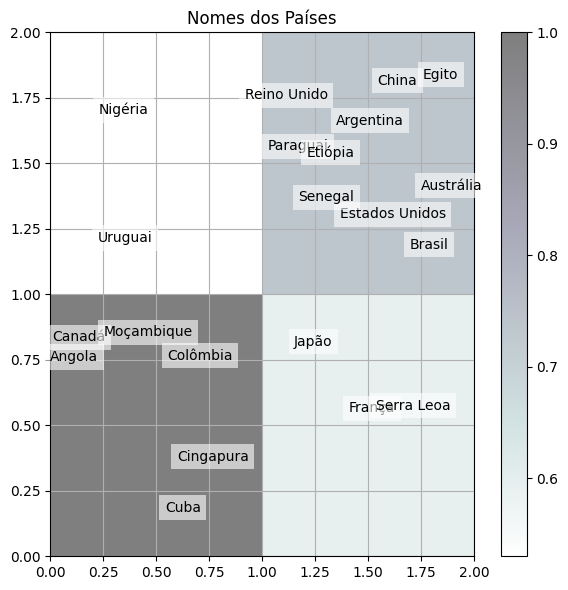

In [48]:
# normalizar os dados
np.random.shuffle(data)
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

som = MiniSom(2, 2, 4, sigma=1.0, learning_rate=0.5, random_seed=42)
som.pca_weights_init(data_normalized)
som.train_random(data_normalized, 1000)

# Plotar o mapa de calor do SOM
plt.figure(figsize=(6, 6))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=0.5)
plt.colorbar()
plt.grid()

# Plotar os nomes dos países nos neurônios vencedores
for i, country in enumerate(countries):
    w = som.winner(data_normalized[i])
    plt.text(w[0] + 0.5 + (np.random.rand(1) - 0.5) * 0.8,
             w[1] + 0.5 + (np.random.rand(1) - 0.5) * 0.8,
             country,
             horizontalalignment='center',
             verticalalignment='center',
             fontsize=10,
             bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))

plt.title('Nomes dos Países')
plt.tight_layout()
plt.show()

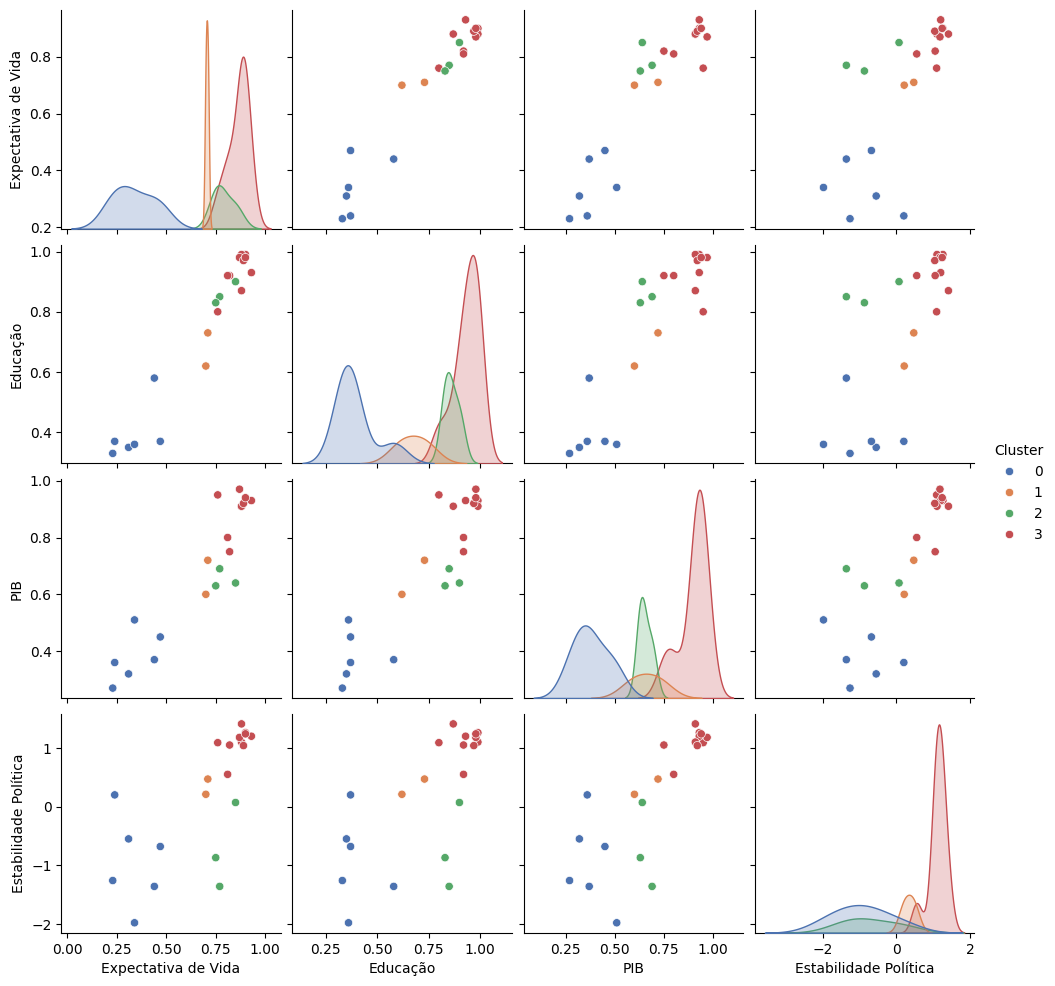

In [53]:
# Obter os índices dos clusters para cada dado
winner_coordinates = np.array([som.winner(x) for x in data_normalized]).T
cluster_index = np.ravel_multi_index(winner_coordinates, (2, 2))

# Criar DataFrame para análise
df = pd.DataFrame(data, columns=['Expectativa de Vida', 'Educação', 'PIB', 'Estabilidade Política'])
df['País'] = countries
df['Cluster'] = cluster_index

# Plotar o pairplot com os clusters coloridos
sns.pairplot(df, hue='Cluster', palette='deep', markers='o')
plt.show()